In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
seed=42

# Finger Classification Data

100 samples of 6 gestures were recorded with the Myo in a position which imitated Sosins.
The positions of each sensor were marked onto the hand using marker pen and then the sensors were all rotated by 22.5° to the midpoints between the sensors in the previous experiment and another 100 data points were gathered. 



In [14]:
path = "../../data/FingerClassification/"
path1 = path+"UpperForearm/"

In [15]:
rest  = np.fromfile(path1+"vals0.dat", dtype=np.uint16).reshape((-1, 8))
thumb  = np.fromfile(path1+"vals1.dat", dtype=np.uint16).reshape((-1, 8))
index  = np.fromfile(path1+"vals2.dat", dtype=np.uint16).reshape((-1, 8))
middle = np.fromfile(path1+"vals3.dat", dtype=np.uint16).reshape((-1, 8))
ring   = np.fromfile(path1+"vals4.dat", dtype=np.uint16).reshape((-1, 8))
pinky  = np.fromfile(path1+"vals5.dat", dtype=np.uint16).reshape((-1, 8))
thumb_up = np.fromfile(path1+"vals6.dat", dtype=np.uint16).reshape((-1, 8))
data = [rest, thumb, index, middle, ring, pinky, thumb_up]
label_cols = ['rest', 'thumb_in', 'index', 'middle', 'ring', 'pinky', 'thumb_up']

In [16]:
for i in range(len(data)):
    print(label_cols[i], data[i].shape[0])

rest 110
thumb_in 110
index 110
middle 111
ring 107
pinky 112
thumb_up 104


During the recording, I accidentally recorded the last 3 datapoints of pinky wrong. 
Those should be ring finger values. These have been hex edited out.

In [5]:
pinky = np.fromfile(path1+"vals5.dat", dtype=np.uint16).reshape((-1, 8))
pinky = pinky[:109,:]
data = [rest, thumb, index, middle, ring, pinky, thumb_up]

In [6]:
df = pd.DataFrame(np.vstack(data))

In [7]:
df.shape

(761, 8)

## Adding a labels column

In [8]:
labelled_data = []
for i in range(len(data)):
    a = data[i]
    labels_col = np.ones((a.shape[0], 1), dtype=a.dtype)*i
    b = np.hstack((a, labels_col))
    labelled_data.append(b)
    
cols = ["Ch1","Ch2","Ch3","Ch4","Ch5", "Ch6", "Ch7", "Ch8", "Finger"]
df = pd.DataFrame(np.vstack(labelled_data), columns=cols)
# Replacing numerical fingernames with str
df['Finger'] = df['Finger'].apply(lambda x: label_cols[x])


In [9]:
df.head()

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,Finger
0,22,32,113,113,53,43,18,21,rest
1,22,36,113,105,52,43,20,19,rest
2,22,35,109,87,48,42,19,19,rest
3,21,36,95,95,52,44,23,20,rest
4,20,35,125,96,53,44,24,20,rest


In [10]:
#air_df.to_csv('air_df.csv',index=False)

In [11]:
df.var()

Ch1    52839.732170
Ch2    92856.385424
Ch3    20690.411076
Ch4    13767.547514
Ch5     2894.826579
Ch6    14388.141099
Ch7    75230.603904
Ch8    32222.801366
dtype: float64

[Text(0.5, 1.0, 'sEMG and Finger corrolations')]

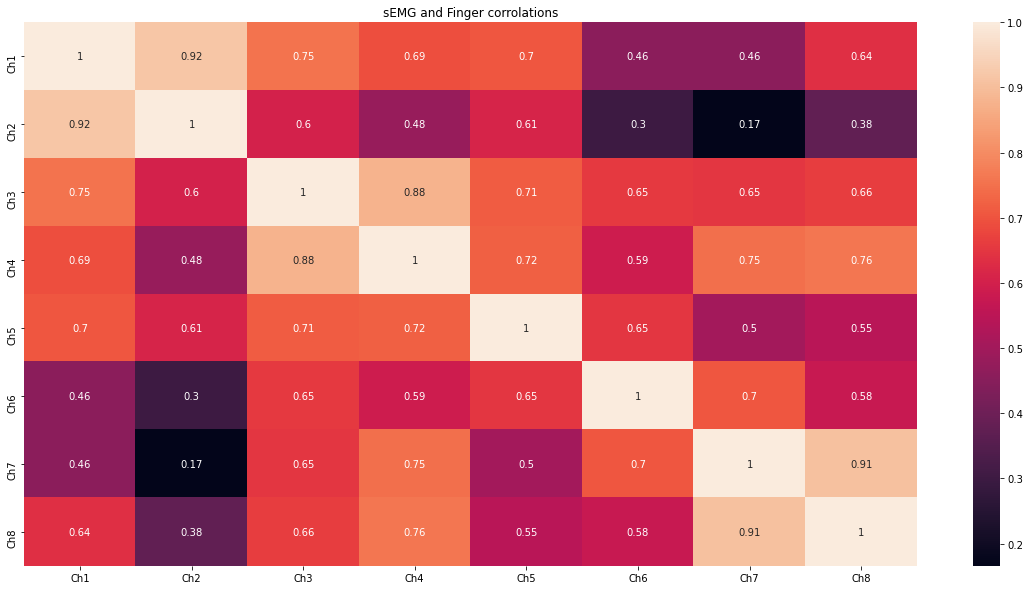

In [12]:
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(df.corr(), annot=True).set(title="sEMG and Finger corrolations")

array([[<AxesSubplot:title={'center':'Ch1'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch2'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch3'}, xlabel='[Finger]'>],
       [<AxesSubplot:title={'center':'Ch4'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch5'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch6'}, xlabel='[Finger]'>],
       [<AxesSubplot:title={'center':'Ch7'}, xlabel='[Finger]'>,
        <AxesSubplot:title={'center':'Ch8'}, xlabel='[Finger]'>,
        <AxesSubplot:>]], dtype=object)

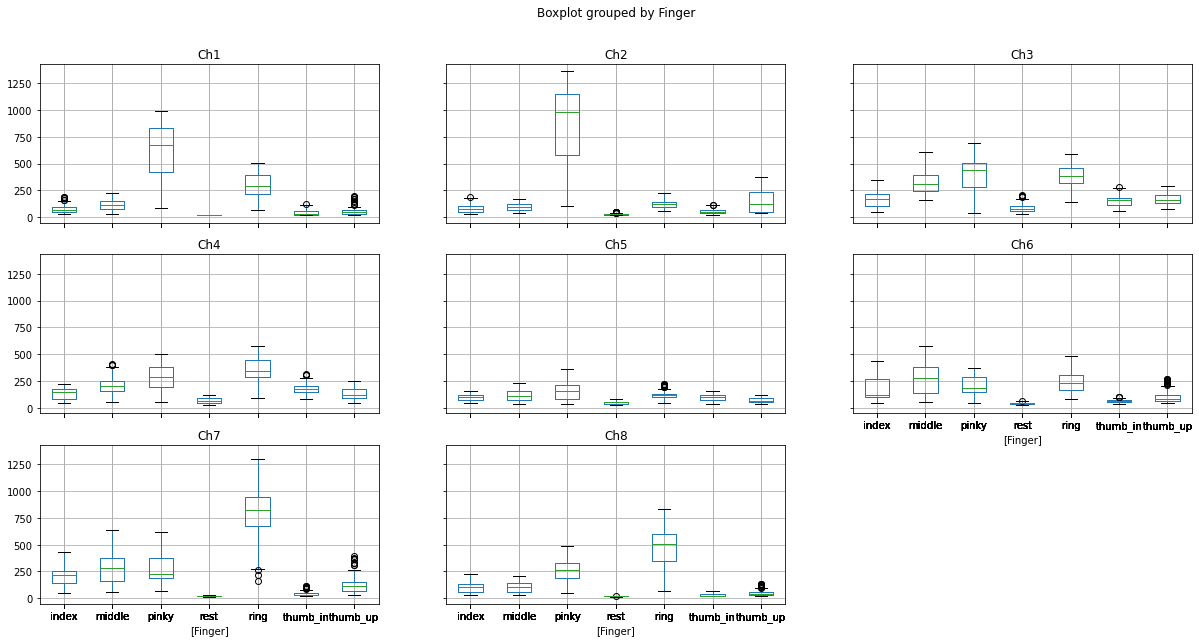

In [13]:
df.boxplot(by='Finger')

<AxesSubplot:title={'center':'Ch2'}, xlabel='[Finger]'>

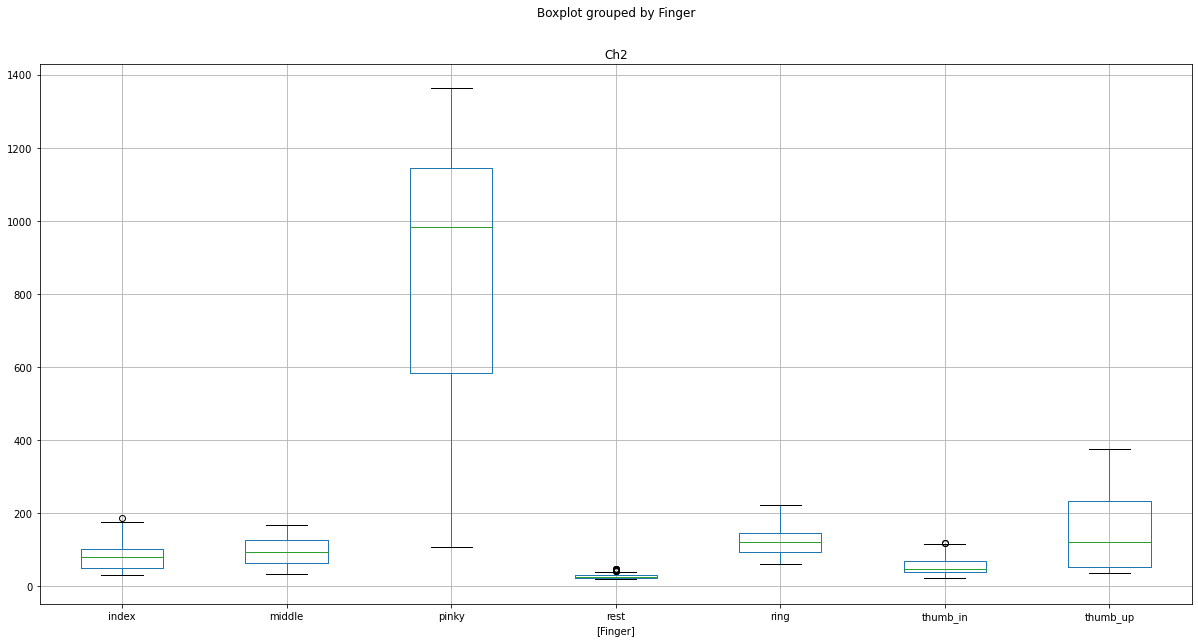

In [14]:
df[['Ch2', 'Finger']].boxplot(by='Finger')

In [15]:
df.groupby('Finger').mean()

,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8
Finger,,,,,,,,
index,76.336364,85.009091,170.881818,137.272727,95.218182,179.045455,216.136364,101.863636
middle,113.315315,93.117117,324.540541,207.963964,115.810811,267.783784,276.774775,104.459459
pinky,618.183486,858.651376,392.706422,284.678899,156.201835,210.321101,284.871560,266.137615
rest,19.972727,27.554545,84.672727,64.500000,49.363636,42.163636,20.963636,19.636364
ring,295.794393,123.663551,379.046729,354.934579,118.476636,246.177570,804.093458,488.224299
thumb_in,43.809091,53.981818,154.345455,173.954545,97.809091,60.618182,43.527273,33.172727
thumb_up,57.894231,145.028846,170.163462,128.750000,69.423077,106.865385,125.932692,47.134615


<AxesSubplot:>

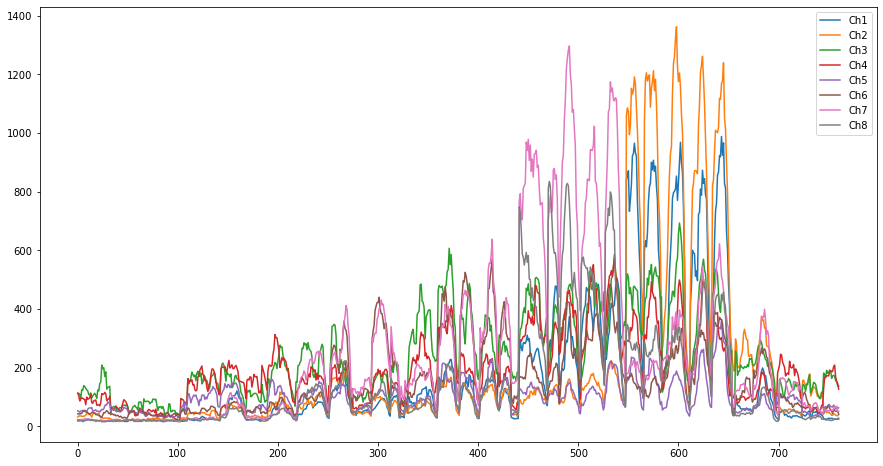

In [16]:
import matplotlib

matplotlib.rc('figure', figsize=(15, 8))

df.plot(figsize=(15, 8))

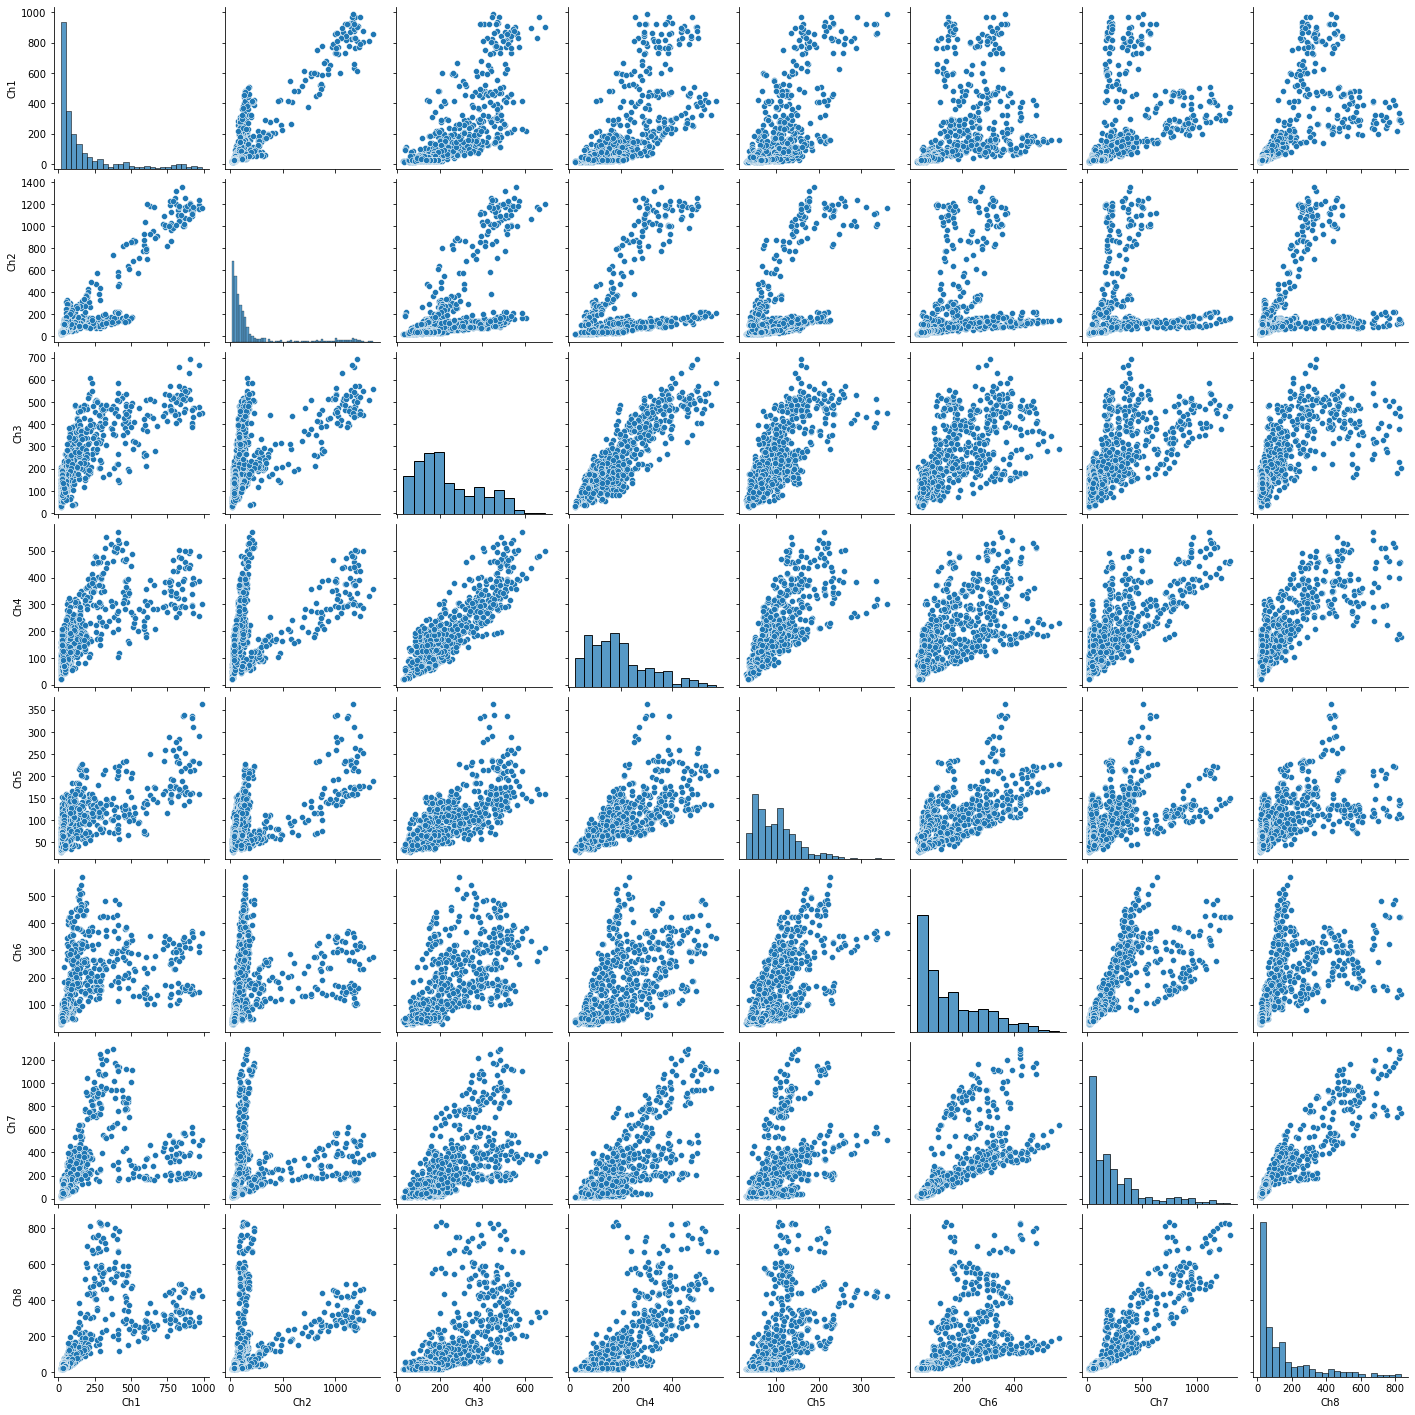

In [17]:
sns.pairplot(df)

## PCA

In [18]:
from sklearn import decomposition

X = df.drop(['Finger'],1).values
X.shape

(761, 8)

In [19]:
pca = decomposition.PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.64913913 0.27533532 0.03313188 0.0217728  0.00708737 0.00580953
 0.00542275 0.00230124]


In [20]:
X.shape

(761, 8)

In [21]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
Xp = pca.transform(X)

print(pca.explained_variance_ratio_)

[0.64913913 0.27533532]


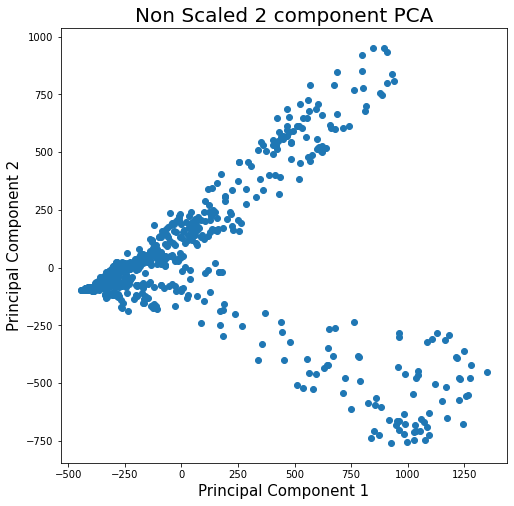

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Non Scaled 2 component PCA', fontsize = 20)
ax.scatter(Xp[:,0], Xp[:,1])

In [23]:
plt.cm.nipy_spectral(5)

(0.18301960784313726, 0.0, 0.20913725490196078, 1.0)

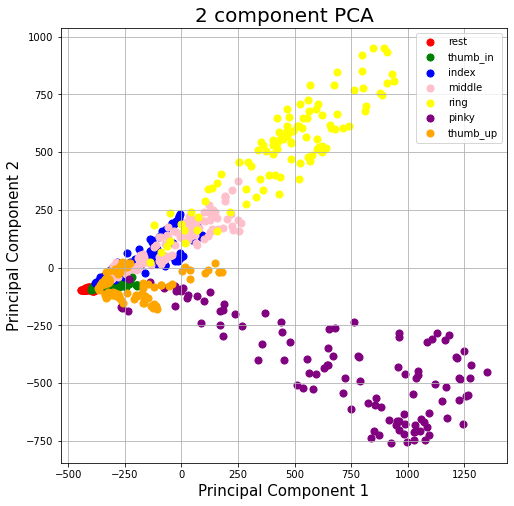

In [24]:
principalDf = pd.DataFrame(data = Xp
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Finger']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = label_cols
colors = ['red', 'green', 'blue', 'pink', 'yellow', 'purple', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Finger'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

[0.6746837  0.15866682]


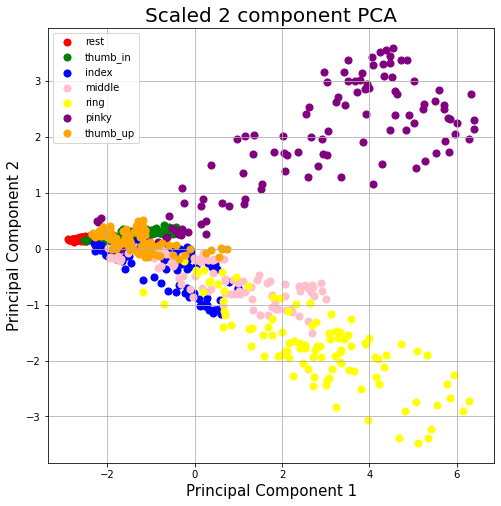

In [25]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
X = df.drop(['Finger'],1).values
# Separating out the target
y = df['Finger'].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['Finger']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Scaled 2 component PCA', fontsize = 20)
targets = label_cols
colors = ['red', 'green', 'blue', 'pink', 'yellow', 'purple', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Finger'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

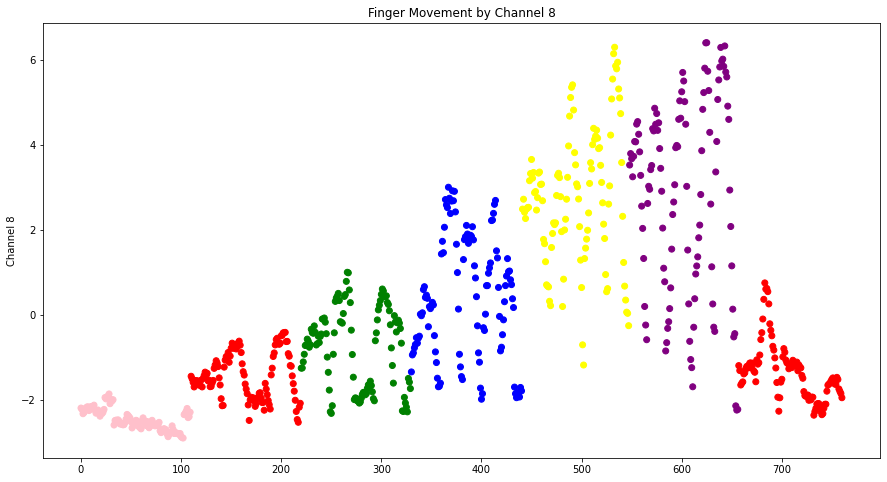

In [26]:
fig, ax = plt.subplots()

colors = {'rest':'pink', 'thumb_up':'red', 'index':'green', 'middle':'blue', 'ring':'yellow', 'pinky':'purple', 'thumb_in':'red'}
ax.scatter(df.index, principalDf['principal component 1'], c=df['Finger'].map(colors))

ax.set_title("Finger Movement by Channel 8")
ax.set_ylabel("Channel 8")
plt.show()

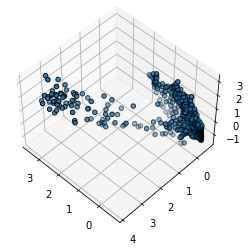

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

y = df.Finger

ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap=plt.cm.nipy_spectral,
           edgecolor='k')

## LDA

Mean Accuracy: 0.781 (0.040)


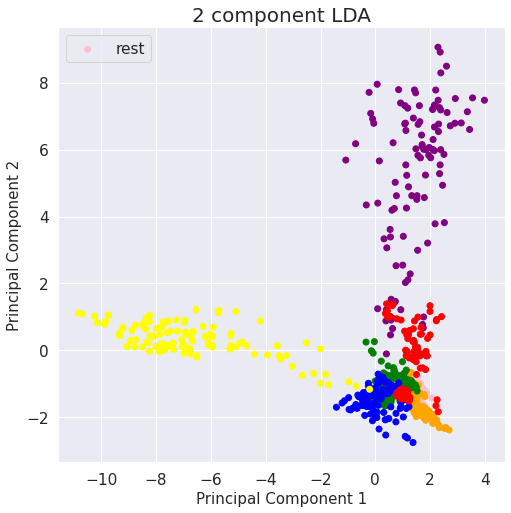

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

X = df.drop(['Finger'], 1)
y = df.Finger

clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

Xl = clf.transform(X)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
ax.scatter(Xl[:,0], Xl[:,1], c=df['Finger'].map(colors))
ax.legend(label_cols)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
# evaluate model
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

## PCA LDA

Mean Accuracy: 0.781 (0.040)


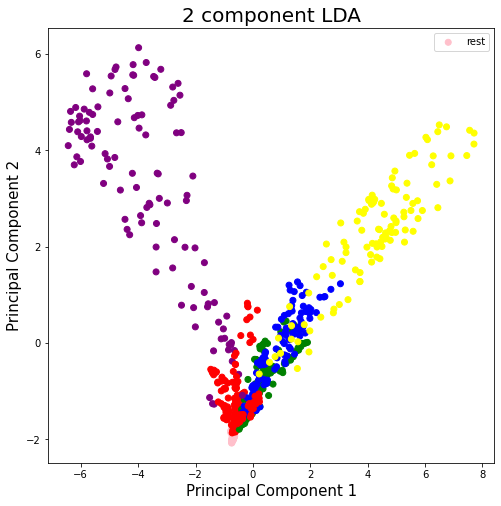

In [29]:
clf = LinearDiscriminantAnalysis()
clf.fit(Xp, y)

Xl = clf.transform(Xp)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
ax.scatter(Xl[:,0], Xl[:,1], c=df['Finger'].map(colors))
ax.legend(label_cols)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
# evaluate model
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

# XGBoost

In order to stop our classifier predicting the most common class with higher probability, we will select the first 100 samples from each class. Then a random seeded selection of 67 samples will be used as training data to predict the other 33 samples.
When train and test splits are made, we stratify the data to ensure there is no class imbalance.

In [30]:
rest  = np.fromfile(path1+"vals0.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
thumb  = np.fromfile(path1+"vals1.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
index  = np.fromfile(path1+"vals2.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
middle = np.fromfile(path1+"vals3.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
ring   = np.fromfile(path1+"vals4.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
pinky  = np.fromfile(path1+"vals5.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
thumb_up = np.fromfile(path1+"vals6.dat", dtype=np.uint16).reshape((-1, 8))[:100,:]
data = [rest, thumb, index, middle, ring, pinky, thumb_up]
label_cols = ['rest', 'thumb_in', 'index', 'middle', 'ring', 'pinky', 'thumb_up']

In [31]:
# Add labels
labelled_data = []
for i in range(len(data)):
    a = data[i]
    labels_col = np.ones((a.shape[0], 1), dtype=a.dtype)*i
    b = np.hstack((a, labels_col))
    labelled_data.append(b)
    
cols = ["Ch1","Ch2","Ch3","Ch4","Ch5", "Ch6", "Ch7", "Ch8", "Finger"]
df100 = pd.DataFrame(np.vstack(labelled_data), columns=cols)
# Replacing numerical fingernames with str
df100['Finger'] = df100['Finger'].apply(lambda x: label_cols[x])

In [32]:
df100.to_csv(path1+'Labelled100.csv',index=False)

In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = df100.drop(['Finger'],1).values
Y = df100.Finger

# split data into train and test sets
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed, stratify=Y)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

y_pred
#predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.84%


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

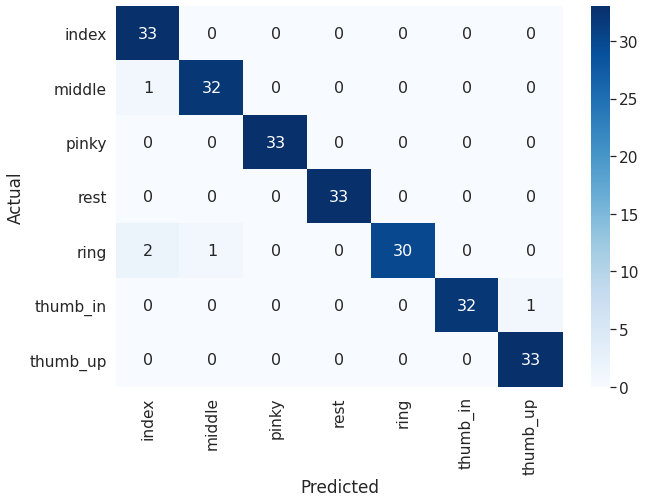

In [34]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

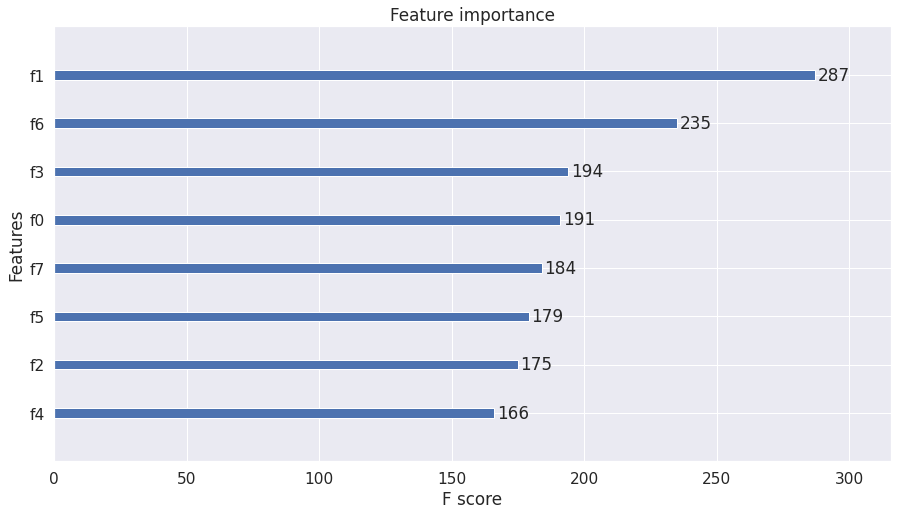

In [35]:
from xgboost import plot_importance

# plot
plot_importance(model)

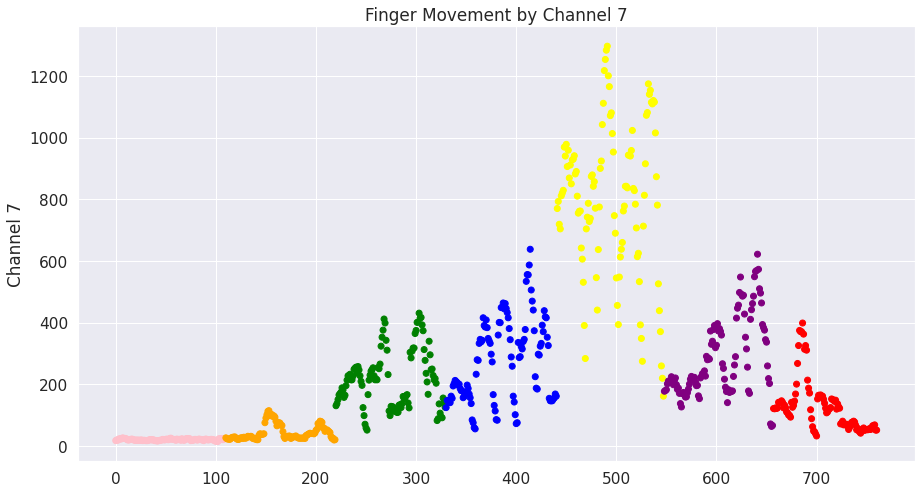

In [36]:
fig, ax = plt.subplots()

colors = {'rest':'pink', 'thumb_up':'red', 'index':'green', 'middle':'blue', 'ring':'yellow', 'pinky':'purple', 'thumb_in':'orange'}
ax.scatter(df.index, df['Ch7'], c=df['Finger'].map(colors))

ax.set_title("Finger Movement by Channel 7")
ax.set_ylabel("Channel 7")
plt.show()

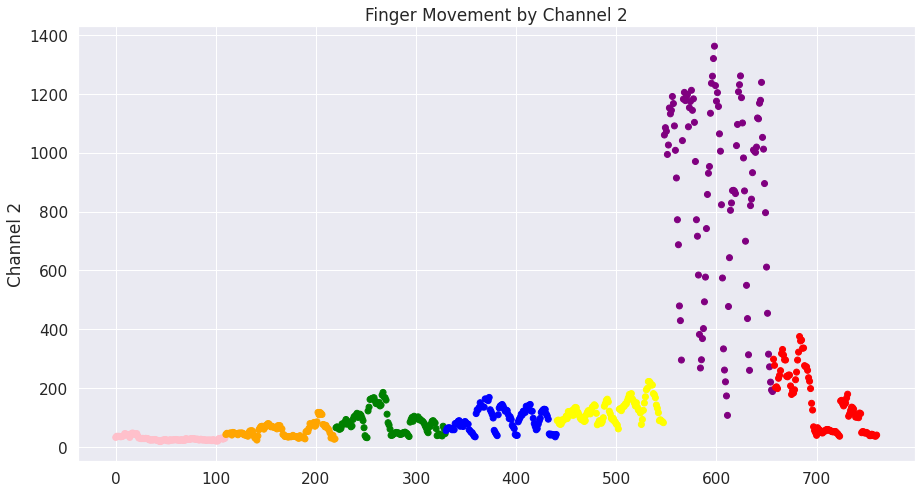

In [37]:
fig, ax = plt.subplots()

colors = {'rest':'pink', 'thumb_up':'red', 'index':'green', 'middle':'blue', 'ring':'yellow', 'pinky':'purple', 'thumb_in':'orange'}
ax.scatter(df.index, df['Ch2'], c=df['Finger'].map(colors))

ax.set_title("Finger Movement by Channel 2")
ax.set_ylabel("Channel 2")
plt.show()

No handles with labels found to put in legend.


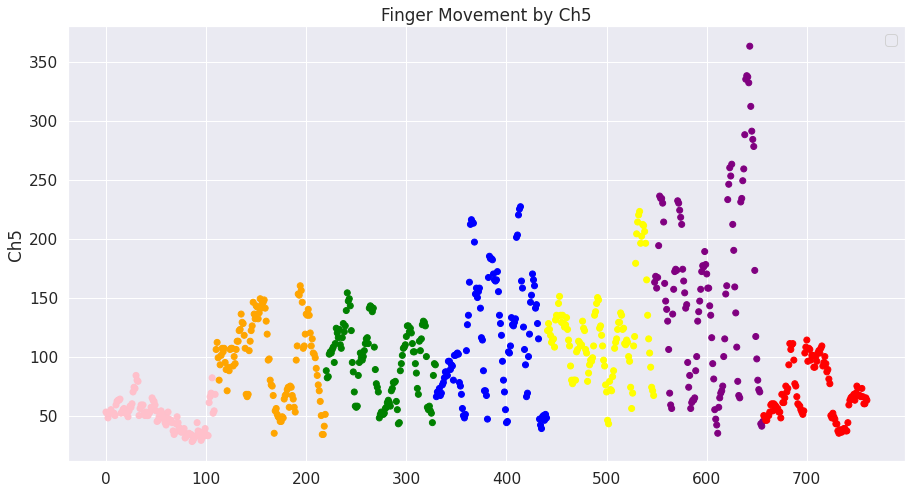

In [38]:
ch = 5
channel = "Ch" + str(ch)
fig, ax = plt.subplots()

colors = {'rest':'pink', 'thumb_up':'red', 'index':'green', 'middle':'blue', 'ring':'yellow', 'pinky':'purple', 'thumb_in':'orange'}
ax.scatter(df.index, df[channel], c=df['Finger'].map(colors))
ax.legend()
ax.set_title("Finger Movement by " + channel)
ax.set_ylabel(channel)
plt.show()